Movie weights from IMDb ratings (higher rating = more likely):
Kung Fu Hustle: 7.7
The Dictator: 6.5
The Hangover: 7.7
Police Academy: 6.7
The Mafia Kills only in Summer: 7.2
Grimsby: 6.2
Let the Bullet Fly: 7.3
Rush Hour 3: 6.2
Ella Enchanted: 6.3
The Devil wears Prada: 6.9
Airplane: 7.7
Training Day: 7.7
Interstellar: 8.6
Hidden Figures: 7.8
Despicable me: 7.6
Spaceballs: 7.1
The Sixth Sense: 8.2
Her: 8.0
The Martian: 8.0
Inception: 8.8
Deep Cover: 6.9
Tenet: 7.3
Predestination: 7.4
Hoodwinked: 6.5
Fifth Element: 7.6



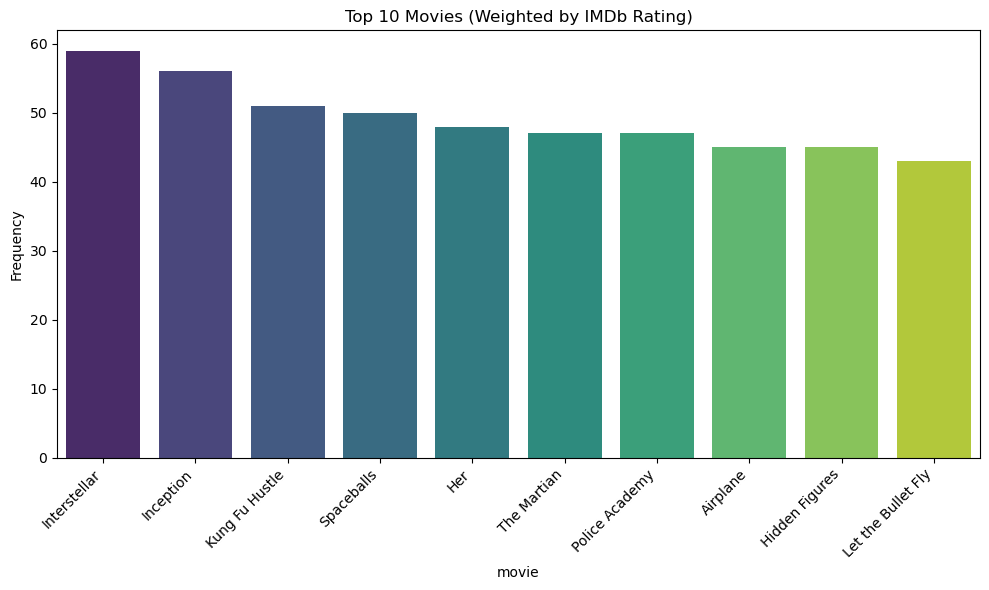

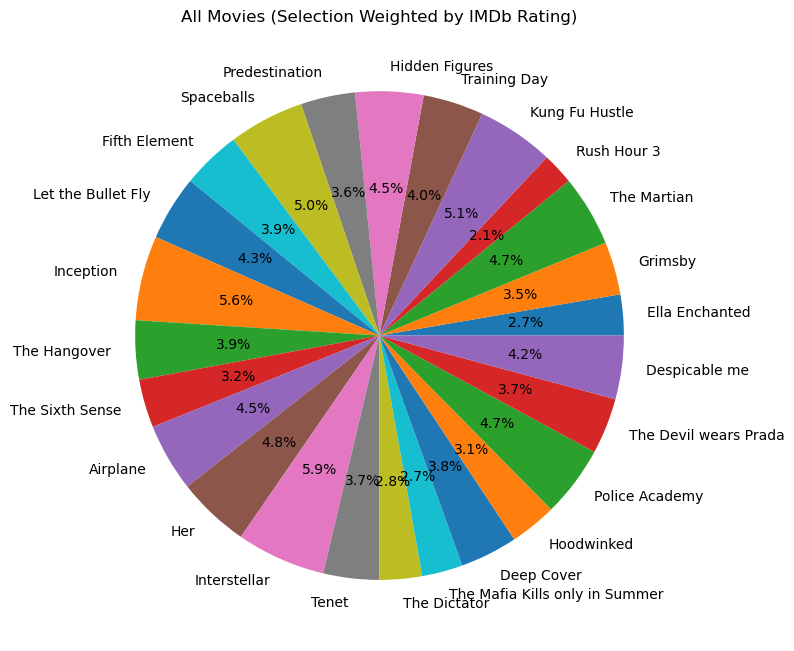

Selected movie: Interstellar
Frequency: 59


In [1]:
import random
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\samta\Desktop\List.txt"

# Read movie list
with open(file_path, "r", encoding="utf-8") as f:
    movies = [line.strip() for line in f if line.strip()]

# IMDb ratings (approximate where needed, scale 1–10)
imdb_rating = {
    "Kung Fu Hustle": 7.7,        
    "The Dictator": 6.5,         
    "The Hangover": 7.7,
    "Police Academy": 6.7,
    "The Mafia Kills only in Summer": 7.2,
    "Grimsby": 6.2,
    "Let the Bullet Fly": 7.3,
    "Rush Hour 3": 6.2,
    "Ella Enchanted": 6.3,
    "The Devil wears Prada": 6.9,
    "Airplane": 7.7,
    "Training Day": 7.7,
    "Interstellar": 8.6,
    "Hidden Figures": 7.8,       
    "Despicable me": 7.6,
    "Spaceballs": 7.1,
    "The Sixth Sense": 8.2,
    "Her": 8.0,
    "The Martian": 8.0,
    "Inception": 8.8,
    "Deep Cover": 6.9,
    "Tenet": 7.3,
    "Predestination": 7.4,
    "Hoodwinked": 6.5,           
    "Fifth Element": 7.6
}

default_rating = 7.0  # fallback if something is missing

# Build weight list from IMDb ratings
weights = [imdb_rating.get(m, default_rating) for m in movies]

print("Movie weights from IMDb ratings (higher rating = more likely):")
for movie, w in zip(movies, weights):
    print(f"{movie}: {w}")
print()

# Weighted random sampling with replacement
selections = random.choices(movies, weights=weights, k=1000)

# Count frequencies
counts = Counter(selections)

# DataFrame for seaborn/plots
df = pd.DataFrame({"movie": list(counts.keys()),
                   "count": list(counts.values())})

# ----- Top‑10 bar plot (seaborn) -----
top10_df = df.sort_values("count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_df,
    x="movie",
    y="count",
    hue="movie",
    palette="viridis",
    legend=False
)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Frequency")
plt.title("Top 10 Movies (Weighted by IMDb Rating)")
plt.tight_layout()
plt.show()

# ----- Pie chart for all movies -----
plt.figure(figsize=(8, 8))
plt.pie(df["count"], labels=df["movie"], autopct="%1.1f%%")
plt.title("All Movies (Selection Weighted by IMDb Rating)")
plt.tight_layout()
plt.show()

# Winner
winner_row = df.sort_values("count", ascending=False).iloc[0]
print("Selected movie:", winner_row["movie"])
print("Frequency:", winner_row["count"])
